In [1]:
%load_ext autoreload
%matplotlib inline

# Plotting AnomalyDetectors' scores

This notebook generates scores for features using all of the AnomalyDetectors and plots the scores. Anomaly scores near 1 are most anomalous, while scores near zero means the data is normal.

In [2]:
import os, sys
import numpy as np
import pandas as pd
from IPython.display import display
sys.path.append(os.path.abspath(os.path.join('..')))

import plot.anomalies
from plot import pyplot as plt
from database.CERNMongoClient import CERNMongoClient
from anomaly_detection.factory import AnomalyDetectorFactory
from evaluation import evaluation, segmentation
from feature_extraction import feature_extraction, preprocessing

db = CERNMongoClient()

# auto-load changes in imported modules
%autoreload 2

In [3]:
df = feature_extraction.load_features_from_file(beam=1)
df_scaled = preprocessing.scale_robust(df)

Loading file '/home/n/masters-thesis/src/../data-cern/features-b1-'.
File not found, loading '/home/n/masters-thesis/src/../data-cern/features-b1-sw_10min-2018_05_17.csv' instead.



## IsolationForest scores

In [26]:
det = AnomalyDetectorFactory.create("isolation_forest", n_estimators=100, max_samples=512, n_jobs=-1, verbose=1)
det.fit(df_scaled)
scores = det.anomaly_scores(df_scaled)

[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    1.8s remaining:    5.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    2.6s finished


In [31]:
plot.anomalies.anomaly_scores(df.index, scores, "Isolation Forest")

count    141518.000000
mean          0.211545
std           0.181704
min           0.000000
25%           0.071610
50%           0.142379
75%           0.315650
max           1.000000
dtype: float64


### IsolationForest raw scores (before negating and scaling)

The graphs are mirrored horizontally. Mirroring and scaling was necessary to make anomalous scores lie near 1 and normal scores near 0.

In [28]:
scores_iforest = det.iforest.decision_function(df_scaled)

count    141518.000000
mean          0.096254
std           0.052145
min          -0.130016
25%           0.066378
50%           0.116103
75%           0.136412
max           0.156963
dtype: float64


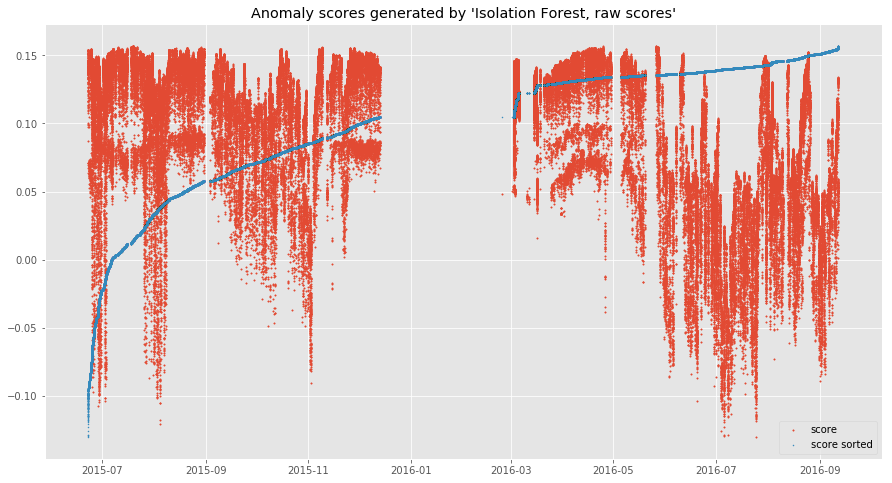

In [33]:
plot.anomalies.anomaly_scores(df.index, scores_iforest, "Isolation Forest, raw scores")

## GMM Scores

In [54]:
det2 = AnomalyDetectorFactory.create("gmm", n_components=2, covariance_type="tied", verbose=1)
det2.fit(df_scaled)
scores = det2.anomaly_scores(df_scaled)

Initialization 0
  Iteration 0
Initialization converged: True


count    141518.000000
mean          0.000533
std           0.003991
min           0.000000
25%           0.000138
50%           0.000272
75%           0.000593
max           1.000000
dtype: float64


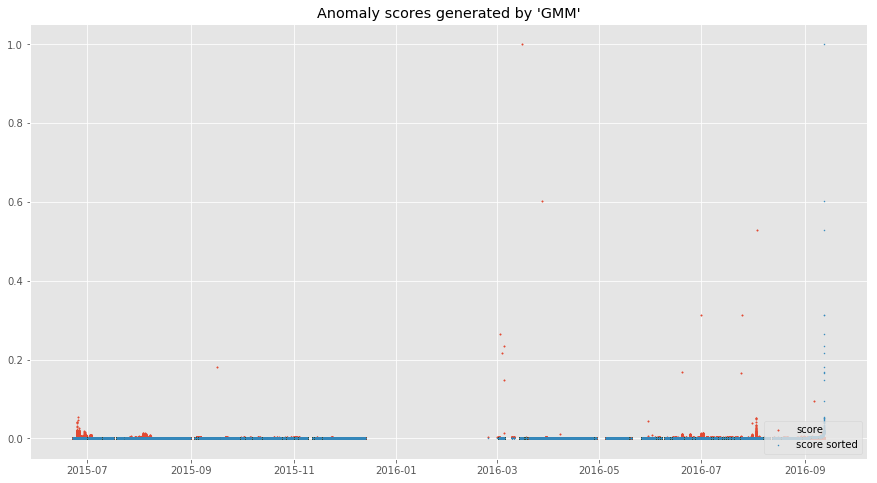

In [55]:
plot.anomalies.anomaly_scores(df.index, scores, "GMM")

count    141502.000000
mean          0.000502
std           0.000917
min           0.000000
25%           0.000138
50%           0.000272
75%           0.000593
max           0.049361
dtype: float64


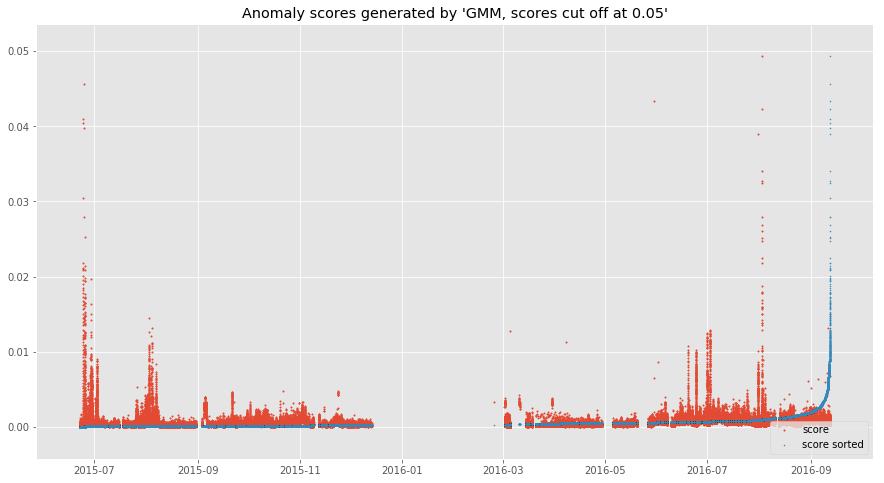

In [58]:
plot.anomalies.anomaly_scores(df.index[scores<0.05], scores[scores<0.05], "GMM, scores cut off at 0.05")

###  GMM raw scores

In [74]:
s = det2.gmm.score_samples(df_scaled)
plot.anomalies.anomaly_scores(df.index, s, "GMM, raw scores")

count    141518.000000
mean       -390.763838
std         222.214174
min      -56038.913516
25%        -394.071333
50%        -376.229299
75%        -368.750033
max        -361.067344
dtype: float64


## DummyDetector with different strategies

### Constant strategy

count    141518.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
dtype: float64


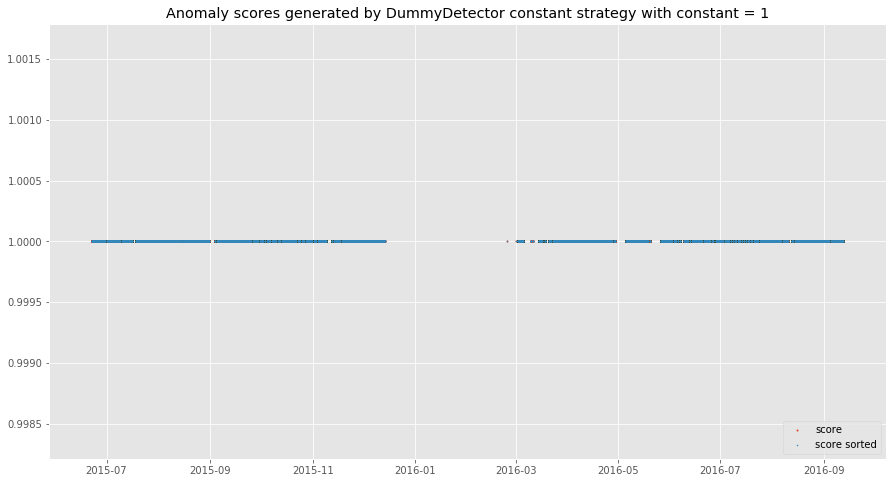

In [62]:
s = AnomalyDetectorFactory.create_constant_detector(1).fit(df_scaled).anomaly_scores(df_scaled)
plot.anomalies.anomaly_scores(df.index, s, "DummyDetector constant strategy with constant = 1")

In [63]:
s = AnomalyDetectorFactory.create_constant_detector(0).fit(df_scaled).anomaly_scores(df_scaled)
plot.anomalies.anomaly_scores(df.index, s, "DummyDetector constant strategy with constant = 0")

count    141518.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
dtype: float64


### Uniformly random strategy

count    141518.000000
mean          0.499568
std           0.288699
min           0.000008
25%           0.249074
50%           0.498580
75%           0.749465
max           0.999993
dtype: float64


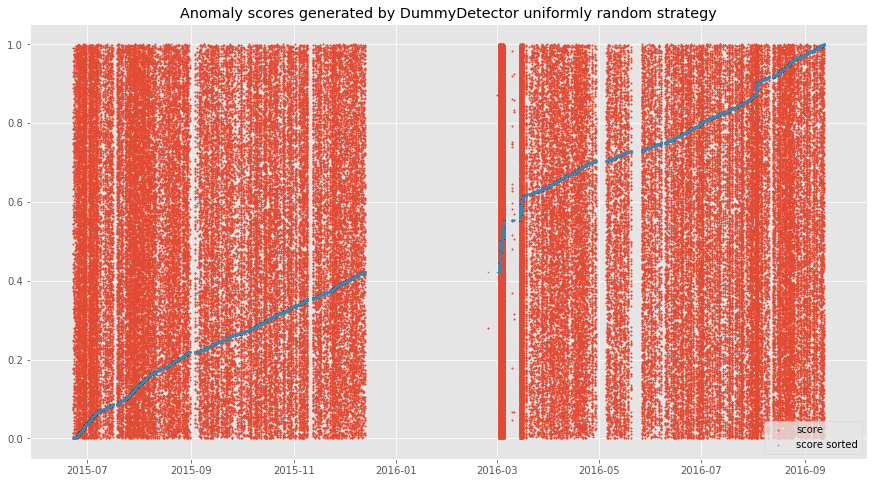

In [65]:
s = AnomalyDetectorFactory.create_uniformly_random_detector().anomaly_scores(df_scaled)
plot.anomalies.anomaly_scores(df.index, s, "DummyDetector uniformly random strategy")

### Stratified random strategy

In [67]:
s = AnomalyDetectorFactory.create_stratified_random_detector(0.01).anomaly_scores(df_scaled)
plot.anomalies.anomaly_scores(df.index, s, "DummyDetector statified random strategy with contamination = 0.01")

count    141518.000000
mean          0.355547
std           0.207115
min           0.000000
25%           0.178700
50%           0.354269
75%           0.530403
max           1.000000
dtype: float64


In [72]:
s = AnomalyDetectorFactory.create_stratified_random_detector(0.1).anomaly_scores(df_scaled)
plot.anomalies.anomaly_scores(df.index, s, "DummyDetector statified random strategy with contamination = 0.1")

count    141518.000000
mean          0.400238
std           0.244783
min           0.000000
25%           0.194777
50%           0.389817
75%           0.583485
max           1.000000
dtype: float64


count    141518.000000
mean          0.599876
std           0.294370
min           0.000000
25%           0.349377
50%           0.700000
75%           0.849252
max           1.000000
dtype: float64


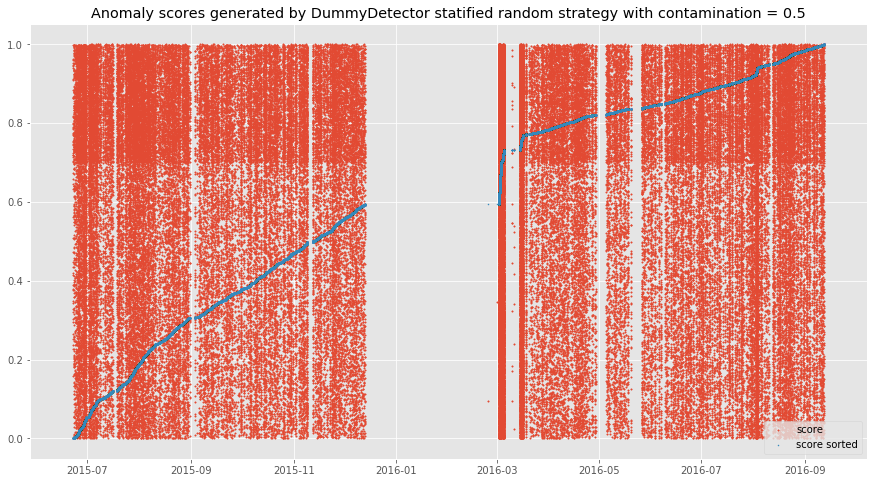

In [73]:
s = AnomalyDetectorFactory.create_stratified_random_detector(0.5).anomaly_scores(df_scaled)
plot.anomalies.anomaly_scores(df.index, s, "DummyDetector statified random strategy with contamination = 0.5")